In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn import metrics
from sklearn.metrics import auc, precision_recall_curve,classification_report,confusion_matrix
import seaborn as sns

In [42]:
d = pd.read_csv('C:/Users/Ankush Negi/Desktop/Video Anomaly Detection in Road Accidents/CSV/Gray.csv',index_col=0)
display(d.head())

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,Class
0,0.091337,0.116164,0.082682,0.065471,0.040325,0.034460,0.041812,0.028746,0.038376,0.118293,...,0.037472,0.016945,0.030078,0.479320,0.269376,0.093853,0.070431,0.076576,0.078034,0
1,0.339148,0.426073,0.424330,0.343873,0.400055,0.398434,0.229129,0.242470,0.244308,0.209226,...,0.220796,0.224576,0.215038,0.294615,0.231862,0.194865,0.235808,0.202895,0.188064,0
2,1.169620,1.149726,1.283289,1.330018,1.377478,1.384790,1.273399,1.167964,1.199596,1.282005,...,1.133217,0.803359,0.716273,0.977331,1.306488,0.970416,0.732468,0.819460,1.175146,0
3,0.678514,0.550748,1.211692,1.164041,0.591498,0.268360,0.262265,0.786680,0.841955,0.203932,...,0.207253,0.043071,0.027644,0.729377,0.760799,0.590914,0.145336,0.130083,0.101409,0
4,0.814380,0.860416,0.717146,0.605213,0.522557,0.419437,0.322370,0.348295,0.648754,0.534378,...,0.414965,0.420689,0.430630,0.549334,0.708087,0.599063,0.549627,0.393857,0.356781,0


In [43]:
data = d

X_train, X_test = train_test_split(data, test_size=0.2, random_state=0)
Y_train,Y_test=X_train['Class'].values,X_test['Class'].values


X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)

std =StandardScaler()
X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)


In [44]:
for i in range(1,10):
    svc = SVC(kernel='rbf',C=i,degree=2,probability = True).fit(X_train,Y_train)
    
    test_prob = svc.decision_function(X_test) 
    test_pred = svc.predict(X_test)    
    
    train_prob = svc.decision_function(X_train) 
    train_pred = svc.predict(X_train)    
    
    fpr_test,tpr_test,_ = metrics.roc_curve(Y_test,test_prob)     
    auc_test = metrics.auc(fpr_test,tpr_test)                              
    score_test = metrics.accuracy_score(Y_test,test_pred)
    
    fpr_train,tpr_train,_ = metrics.roc_curve(Y_train,train_prob)     
    auc_train = metrics.auc(fpr_train,tpr_train)                              
    score_train = metrics.accuracy_score(Y_train,train_pred)
    
    print('Test: %.4f' %score_test,'%.4f' %auc_test,'|',"Train: %.4f" %score_train,'%.4f' %auc_train)

Test: 0.7000 0.7167 | Train: 0.7950 0.9121
Test: 0.7000 0.7143 | Train: 0.8075 0.9466
Test: 0.7167 0.7094 | Train: 0.8285 0.9601
Test: 0.7000 0.7143 | Train: 0.8661 0.9664
Test: 0.7000 0.7082 | Train: 0.8745 0.9687
Test: 0.7167 0.7057 | Train: 0.8828 0.9714
Test: 0.7167 0.7009 | Train: 0.8828 0.9741
Test: 0.7167 0.7009 | Train: 0.9038 0.9771
Test: 0.7167 0.6947 | Train: 0.9121 0.9839


In [45]:
list_score=[]
for i in range(30):
    X_train, X_test = train_test_split(data, test_size=0.2, random_state=i)
    Y_train,Y_test=X_train['Class'].values,X_test['Class'].values
    X_train = X_train.drop(['Class'], axis=1).values
    X_test = X_test.drop(['Class'], axis=1).values

    std =StandardScaler()
    X_train=std.fit_transform(X_train)
    X_test=std.transform(X_test)
    best_score=[]
    for j in range(1,10):
        svc = SVC(kernel='rbf',C=j,degree=6,probability = True).fit(X_train,Y_train)

        test_prob = svc.decision_function(X_test) 
        test_pred = svc.predict(X_test)    

        train_prob = svc.decision_function(X_train) 
        train_pred = svc.predict(X_train)    

        fpr_test,tpr_test,_ = metrics.roc_curve(Y_test,test_prob)     
        auc_test = metrics.auc(fpr_test,tpr_test)                              
        score_test = metrics.accuracy_score(Y_test,test_pred)

        fpr_train,tpr_train,_ = metrics.roc_curve(Y_train,train_prob)     
        auc_train = metrics.auc(fpr_train,tpr_train)                              
        score_train = metrics.accuracy_score(Y_train,train_pred)
        best_score.append(score_test)
    score=max(best_score)
    list_score.append(score)     
    print('Test: %.4f' %score)
print("Average Test Accuracy: ",np.mean(np.array(list_score)))

Test: 0.7167
Test: 0.8000
Test: 0.7167
Test: 0.7667
Test: 0.7833
Test: 0.6167
Test: 0.8167
Test: 0.7167
Test: 0.7500
Test: 0.7333
Test: 0.7333
Test: 0.7667
Test: 0.8167
Test: 0.7333
Test: 0.7167
Test: 0.8333
Test: 0.6333
Test: 0.7500
Test: 0.8333
Test: 0.7667
Test: 0.7167
Test: 0.6667
Test: 0.7500
Test: 0.7500
Test: 0.7667
Test: 0.7667
Test: 0.7833
Test: 0.8167
Test: 0.7333
Test: 0.7667
Average Test Accuracy:  0.7505555555555555


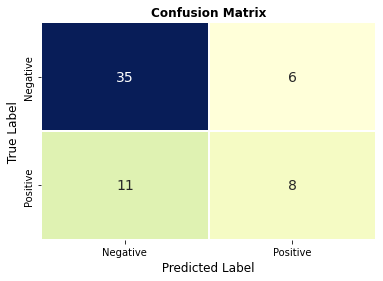


			 Classification Report: 

               precision    recall  f1-score   support

           0       0.76      0.85      0.80        41
           1       0.57      0.42      0.48        19

    accuracy                           0.72        60
   macro avg       0.67      0.64      0.64        60
weighted avg       0.70      0.72      0.70        60



Test Accuracy:  0.7666666666666667


In [46]:
# Create the confusion matrix
cnf_matrix = metrics.confusion_matrix(Y_test, test_pred)

# Create the heatmap
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap="YlGnBu", annot_kws={"fontsize":14}, cbar=False, xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"], linewidths=0.1)

# Add labels and title to the plot
plt.title("Confusion Matrix", fontweight="bold")
plt.xlabel(" Predicted Label ", fontsize=12)
plt.ylabel(" True Label ", fontsize=12)

# Show the plot
plt.show()

print("\n\t\t\t Classification Report: \n\n", classification_report(Y_test, test_pred))
print("\n")
print("Test Accuracy: ", score)